/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


<function matplotlib.pyplot.show(close=None, block=None)>

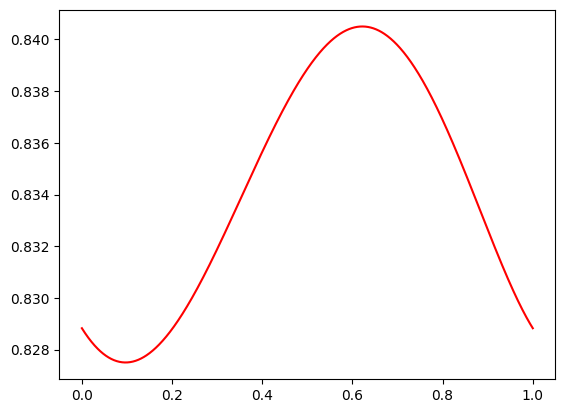

In [ ]:
# code des differences finies


import numpy as np
import scipy as scp
import tensorflow as tf
from matplotlib import pyplot as plt

n=1e3
def f(x,n):
  # suites lorentziennes
    # a=n/np.pi
    # b=1+((x-1/2)**2)*(n**2)
    # return a/b
  # suites gaussiennes
    # a=np.sqrt(np.pi)
    # return (n/a)*tf.exp(-(n**2)*(x-1/2)**2)
    a=n/np.pi
    b=1+((x-1/2)**2)*(n**2)
    # return a/b
    return 1 + x * tf.sin(np.pi * x)

eps=1e-3
def source(x):
    a=1/(eps*np.pi)
    b=1+((x-1/4)**2)*(eps**-2)
    return a/b



def j(u):
    return u**4

def dj(u):
    return 4*u**3

kmax=8; a=1.0; b=0;

N=1000
x=np.linspace(0, 1, N)
x = x[:len(x)-1]
h=1/(N-1)
F=f(x,n)
e = np.ones([N-1,1])
A = scp.sparse.spdiags(np.transpose(np.block([e, -2*e, e])), [-1, 0, 1],N-1,N-1)
A=A.tocsr()
A[N-2,0] = 1
A[0,N-2] = 1
A = A/(h**2)
us = np.linalg.solve(np.eye(N-1)-A, F)
us[N-2]=us[0]
x[N-2]=1.0
u=us;
x = x[:N-1]
u = u[:N-1]
sizeA=np.shape(A)
sizeu=len(u)
err=np.zeros(kmax)
for k in range(kmax):
  D=u - A*u +j(u)-F;
  v=dj(u);
  B=np.diag(v);
  u = u+ np.linalg.solve(np.eye(N-1)-A+B, -D)
  err[k]=h*np.linalg.norm(D,2);

u[N-2]=u[0];
x[N-2]=1.0;
plt.plot(x,u,'r')
plt.show


In [ ]:
print(u[0])

0.7121497544808818


In [ ]:
print(u[-1])

0.7121497544808818
